## Customer Segmentation Using Clustering Algorithm


 Customer segmentation is the process of using unsupervised clustering algorithms to create clusters of customers with similar features based on finding the smallest variations between customers in each group. The goal of customer clustering analysis is to find groups of customers for marketing and product recommendation purposes.

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Read in dataset
df=pd.read_csv('segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


__About the dataset__

The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers.

* ID: Unique identifier of each customer

* Sex: Gender of each customer(0 for male, 1 for female)
* Marital status: Marital status of customer(0 for single, 1 for non-single)
* Age: Age of customers
* Education: Level of education(0 for other/unknown, 1 for high school, 2 for university, 3 for grdauate school)
* Income: Self-reported annual income in USD
* Occupation: Category of occupation of customer(0 for unemployed, 1 for employed, 2 for management or self employed)
* Settlement size: The size of the city the customer lives in(0 for small city, 1 for mid-sized, 2 for big city)

__Getting Descriptive statistics about dataset__

In [ ]:
df.shape

(2000, 8)

The dataframe has 2000 rows and 8 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


There are no missing values in the dataframe as seen above.

In [ ]:
#Get some descriptive statistics
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


__K-means Clustering__

K-means clustering is a popular unsupervised machine learrning algorithm with proven ability at creating clusters from unlabeled data. This is usually achieved by specifying the number of clusters to be extracted from the dataset and then running the algorithm.
To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids (Towards Data Science, 2018)

A major part of the K means algorithm is the selection of the k which represents the number of clusters the dataset will be divided into. This is usually achieved using a method called the elbow method that selects the optimal value of k based on the inertia value obtained after the algorithm is trained on the dataset.

In [ ]:
#Select features to train algorithm on
X=df.iloc[:, 1:].values
X

array([[     0,      0,     67, ..., 124670,      1,      2],
       [     1,      1,     22, ..., 150773,      1,      2],
       [     0,      0,     49, ...,  89210,      0,      0],
       ...,
       [     0,      0,     31, ...,  86400,      0,      0],
       [     1,      1,     24, ...,  97968,      0,      0],
       [     0,      0,     25, ...,  68416,      0,      0]])

In [ ]:
#Feature scaling is necessary as this is a distance based algorithm
sc=StandardScaler()
X_feat=sc.fit_transform(X)
X_feat

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

Text(0, 0.5, 'Inertia values')

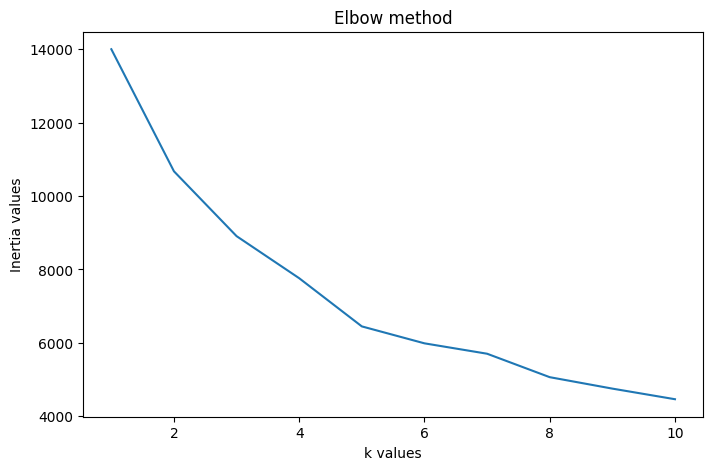

In [ ]:
#Elbow method to get optimum k
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_feat)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('k values')
plt.ylabel('Inertia values')

From our plot, an optimal value for k will be 4 because it denotes a point just before the inertia value decreases drastically connoting possible overfitting in our algorithm.



```
# This is formatted as code
```

Knowing that k=5, we can now build our customer segmentation model

In [ ]:
#Building the model
model=KMeans(n_clusters=5, random_state=42)
model.fit(X_feat)
y_preds=model.fit_predict(X_feat)
y_preds

array([4, 2, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
#Print out cluster centers
model.cluster_centers_

array([[-0.86058457, -0.99302433, -0.04188641, -0.69793577, -0.54825706,
        -0.6538224 , -0.77423904],
       [ 0.87264316,  0.31115509, -0.22291394,  0.11723053, -0.82926316,
        -1.12155239, -0.90972951],
       [ 0.58533304,  0.96543575, -0.68148623, -0.05706734, -0.02765511,
         0.37972994,  0.09324395],
       [-0.90883834, -0.9034699 ,  0.10530961, -0.54696853,  0.60615833,
         0.74101138,  0.98537079],
       [ 0.04617106,  0.37500919,  1.68472214,  1.83112954,  1.05834902,
         0.58503113,  0.51826269]])

In [ ]:
#Print inertia value for k=4
model.inertia_

6449.492103746891

A more precise approach (but also more computationally expensive) is to use the silhouette score, which is the mean silhouette coefficient over all the instances. The silhouette coefficient can vary between -1 and +1: a coefficient close to
+1 means that the instance is well inside its own cluster and far from other clusters,
while a coefficient close to 0 means that it is close to a cluster boundary, and finally a
coefficient close to -1 means that the instance may have been assigned to the wrong
cluster(Hands On Machine Learning By Aurelien Geron)

In [ ]:
#Silhouette score
score = silhouette_score(X_feat, model.labels_ , random_state=42)
score

0.2495301777042489

As earlier explained, this silhouette score would mean most of the instances are close to the boundary of the clusters.

In [ ]:
#Creating a new feature representing the customer segment each customer belongs to
df['customer_segment1']=y_preds

In [ ]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,customer_segment,customer_segment1
0,100000001,0,0,67,2,124670,1,2,4,4
1,100000002,1,1,22,1,150773,1,2,2,2
2,100000003,0,0,49,1,89210,0,0,0,0
3,100000004,0,0,45,1,171565,1,1,3,3
4,100000005,0,0,53,1,149031,1,1,3,3


In [ ]:
#Saving the new dataset
df.to_csv('customer_segment1.csv')